In [2]:
import mysql.connector as connection
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

In [3]:
host = 'localhost'
username = 'root'
passwd = ''
database = 'db_ml_dummies'

In [4]:
try:
    db = connection.connect(host=host, database=database,user=username, passwd=passwd,use_pure=True)
    query = "SELECT * FROM tasks;"
    df = pd.read_sql(query, db)
    db.close()
except Exception as e:
    db.close()
    print(str(e))

In [5]:
df.head()

,task_type,number_of_peoples,estimated_time_in_minutes
0,2,5,2837
1,1,4,3676
2,1,7,1701
3,2,3,5705
4,1,8,1748


In [6]:
df.describe()

,task_type,number_of_peoples,estimated_time_in_minutes
count,10000.000000,10000.000000,10000.000000
mean,2.515300,5.545100,5708.256100
std,1.122538,2.884891,8896.975299
min,1.000000,1.000000,74.000000
25%,2.000000,3.000000,1130.000000
50%,3.000000,6.000000,2771.000000
75%,4.000000,8.000000,6518.500000
max,4.000000,10.000000,102226.000000


In [7]:
df.shape

(10000, 3)

In [8]:
df.to_csv('tasks.csv')

In [9]:
df.isnull().sum()

task_type                    0
number_of_peoples            0
estimated_time_in_minutes    0
dtype: int64

<AxesSubplot:>

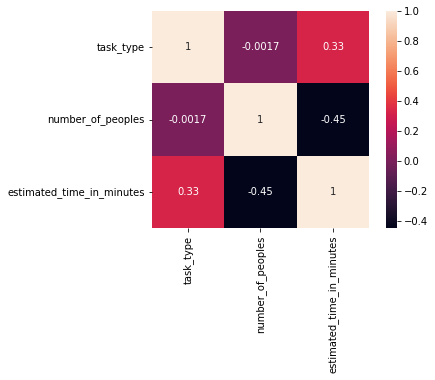

In [10]:
sns.heatmap(df.corr(),annot = True,square = True)

In [11]:
X = df.drop(columns="estimated_time_in_minutes")
y = pd.Series(df['estimated_time_in_minutes'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(8000, 2)

In [13]:
X_train

,task_type,number_of_peoples
9254,4,1
1561,1,5
1670,2,1
6087,3,5
6669,2,6
...,...,...
5734,3,6
5191,2,3
5390,3,2
860,2,5


In [14]:
y_train

9254    23481
1561     1324
1670     1745
6087      847
6669      286
        ...  
5734     7119
5191     8127
5390     2104
860       520
7270     5735
Name: estimated_time_in_minutes, Length: 8000, dtype: int64

In [15]:
X_train.iloc[0:1,:]

,task_type,number_of_peoples
9254,4,1


In [16]:
linReg = LinearRegression()

In [17]:
linReg.fit(X_train, y_train)

LinearRegression()

In [18]:
print(linReg.coef_)
print(linReg.intercept_)

[ 2617.97612568 -1401.00111951]
6905.487866666272


In [19]:
linReg.score(X_test, y_test)

0.3036813942624351

In [20]:
hasilpredict =  linReg.predict(X_train)
hasilpredict

array([15976.39124987,  2518.45839479, 10740.43899851, ...,
       11957.41400468,  5136.43452047, 11773.38789134])

In [21]:
data = {
    'task_type': [2],
    'number_of_peoples': [3]
}

In [22]:
data_predict = pd.DataFrame(data)

In [23]:
data_predict

,task_type,number_of_peoples
0,2,3


In [24]:
hasil_predict = linReg.predict(data_predict)
hasil_predict[0]

7938.436759492255

In [25]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(linReg, open(filename, 'wb'))